In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [3]:
df=pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df=df.drop(columns=['Serial No.'])

In [10]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [11]:
X


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [12]:
y


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [16]:
X_train_scaled


array([[0.2       , 0.35714286, 0.5       , ..., 0.375     , 0.43910256,
        0.        ],
       [0.88      , 1.        , 1.        , ..., 1.        , 0.98397436,
        1.        ],
       [0.82      , 0.82142857, 1.        , ..., 0.625     , 0.82051282,
        1.        ],
       ...,
       [0.36      , 0.64285714, 0.5       , ..., 0.5       , 0.38461538,
        1.        ],
       [0.46      , 0.42857143, 0.5       , ..., 0.875     , 0.59294872,
        0.        ],
       [0.64      , 0.82142857, 1.        , ..., 0.875     , 0.82051282,
        1.        ]])

In [27]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [30]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 0s 672us/sample - loss: 0.2567 - accuracy: 0.0000e+00 - val_loss: 0.1832 - val_accuracy: 0.0000e+00
Epoch 2/100
256/256 [==============================] - 0s 114us/sample - loss: 0.1340 - accuracy: 0.0000e+00 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 3/100
256/256 [==============================] - 0s 91us/sample - loss: 0.0631 - accuracy: 0.0000e+00 - val_loss: 0.0416 - val_accuracy: 0.0000e+00
Epoch 4/100
256/256 [==============================] - 0s 99us/sample - loss: 0.0316 - accuracy: 0.0000e+00 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 5/100
256/256 [==============================] - 0s 81us/sample - loss: 0.0212 - accuracy: 0.0000e+00 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 6/100
256/256 [==============================] - 0s 76us/sample - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 7/100
256/256 [========

In [31]:
y_pred=model.predict(X_test_scaled)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4308331492385784

In [33]:
import matplotlib.pyplot as plt

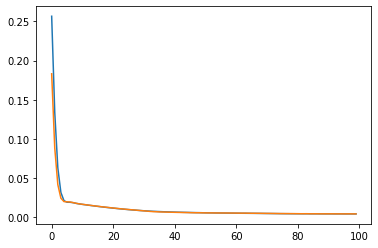

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [36]:
# Finished